In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1.Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], float)
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], float)

In [3]:
np.corrcoef(zp, ks, ddof=0)

c:\users\a.kraev\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: bias and ddof have no effect and are deprecated
  """Entry point for launching an IPython kernel.


array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

In [4]:
b = ((zp * ks).mean() - zp.mean() * ks.mean()) / ((zp ** 2).mean() - (zp.mean() ** 2))
b

2.620538882402765

In [5]:
a = ks.mean() - b * zp.mean()
a

444.1773573243596

In [6]:
y_hat = a + b * zp
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

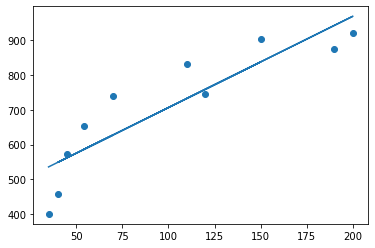

In [7]:
plt.scatter(zp, ks)
plt.plot(zp, y_hat)

In [8]:
mse = ((y_hat - ks)**2).sum() / 10
mse

6470.414201176658

In [9]:
zp_ = zp.reshape(1, len(zp))
ks_ = ks.reshape(1, len(ks))

In [10]:
zp_

array([[ 35.,  45., 190., 200.,  40.,  70.,  54., 150., 120., 110.]])

In [11]:
b = np.dot(np.dot(np.linalg.inv(np.dot(zp_, zp_.T)), zp_), ks_.T)[0][0]
b

5.889820420132689

In [12]:
y_hat_ = b * zp
y_hat_

array([ 206.1437147 ,  265.04191891, 1119.06587983, 1177.96408403,
        235.59281681,  412.28742941,  318.05030269,  883.47306302,
        706.77845042,  647.88024621])

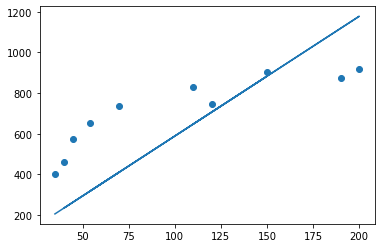

In [13]:
plt.scatter(zp, ks)
plt.plot(zp, y_hat_)

In [14]:
mse = ((y_hat_ - ks)**2).sum() / 10
mse

56516.85841571941

2.Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [15]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], float)
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], float)
alpha = 1e-6
b = 5.0

In [16]:
def mse_(b, y=ks, X=zp, n=len(zp)):
    return np.sum((b * X - y) ** 2) / n

In [17]:
for i in range(2000):
    fp = (1 / len(zp)) * np.sum(2 * (b * zp - ks) * zp)
    b -= alpha * fp
    if i % 100 == 0:
        print(f'iteration: {i}, b : {b}, mse: {mse_(b) }')

iteration: 0, b : 5.0245174, mse: 66832.07825149018
iteration: 100, b : 5.8368841456289715, mse: 56555.46388147409
iteration: 200, b : 5.886581960202314, mse: 56517.00289950258
iteration: 300, b : 5.889622302248138, mse: 56516.85895646055
iteration: 400, b : 5.8898082999592045, mse: 56516.85841774318
iteration: 500, b : 5.889819678661995, mse: 56516.85841572698
iteration: 600, b : 5.889820374772051, mse: 56516.85841571945
iteration: 700, b : 5.889820417357683, mse: 56516.85841571939
iteration: 800, b : 5.889820419962923, mse: 56516.85841571939
iteration: 900, b : 5.889820420122303, mse: 56516.85841571941
iteration: 1000, b : 5.889820420132053, mse: 56516.85841571941
iteration: 1100, b : 5.889820420132648, mse: 56516.85841571943
iteration: 1200, b : 5.889820420132673, mse: 56516.85841571943
iteration: 1300, b : 5.889820420132673, mse: 56516.85841571943
iteration: 1400, b : 5.889820420132673, mse: 56516.85841571943
iteration: 1500, b : 5.889820420132673, mse: 56516.85841571943
iteration:

3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента? 

Сравнение двух средних выборок при известных дисперсиях генеральной совокупности осуществляется при помощи функции Лапласа. 
При неизвестных дисперсиях, распределение отлично от нормального, большой объем выборки используется распределение Стьюдента.

Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [18]:
def mse_(a, b, y=ks, X=zp, n=len(zp)):
    return np.sum((a+b*X - y) ** 2) / n

In [19]:
alpha = 1e-5
a = 100 
b = 0.5
for i in range(1000000):
    a -= alpha * (1 / len(zp)) * np.sum(2 * (a+b*zp - ks))
    b -= alpha * (1 / len(zp)) * np.sum(2 * (a+b*zp - ks) * zp)
    if i % 10000 == 0:
        print(f'iteration: {i}, a : {a}, b : {b}, mse: {mse_(a, b)}')

iteration: 0, a : 100.011184, b : 1.7822453188480003, mse: 193112.3751835355
iteration: 10000, a : 117.05922076863159, b : 5.028260780676913, mse: 33614.15140653042
iteration: 20000, a : 133.2403757895004, b : 4.909160929799408, mse: 30995.19596120071
iteration: 30000, a : 148.62111729442623, b : 4.795952446396363, mse: 28628.929656379933
iteration: 40000, a : 163.2410383653414, b : 4.688343909357986, mse: 26490.97185518289
iteration: 50000, a : 177.1377735813466, b : 4.586058312948099, mse: 24559.29427925374
iteration: 60000, a : 190.34709589759103, b : 4.488832353736373, mse: 22813.99404214966
iteration: 70000, a : 202.9030087319581, b : 4.396415752803039, mse: 21237.088581531818
iteration: 80000, a : 214.8378334966122, b : 4.3085706114712705, mse: 19812.33037726309
iteration: 90000, a : 226.18229279973286, b : 4.225070798908753, mse: 18525.03954637473
iteration: 100000, a : 236.9655895316027, b : 4.145701370022048, mse: 17361.95259005893
iteration: 110000, a : 247.21548203865316, b 

iteration: 930000, a : 441.1031152946318, b : 2.643166548155286, mse: 6472.811579125548
iteration: 940000, a : 441.25518508623134, b : 2.6420472529332133, mse: 6472.58026882416
iteration: 950000, a : 441.39973262639717, b : 2.6409833245266032, mse: 6472.3712764287
iteration: 960000, a : 441.53713000919174, b : 2.6399720241725375, mse: 6472.18244860262
iteration: 970000, a : 441.6677309227541, b : 2.6390107485831447, mse: 6472.011839773409
iteration: 980000, a : 441.7918715597598, b : 2.638097023244246, mse: 6471.857692086561
iteration: 990000, a : 441.90987148285683, b : 2.637228496045397, mse: 6471.718417293627


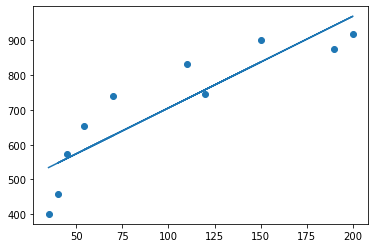

In [20]:
y_hat = a + b * zp
y_hat
plt.scatter(zp, ks)
plt.plot(zp, y_hat)